# Prepare MODIS LST data for Gapfilling process
### Supported MODIS products: MOD11A1, MOD11A2, MOD11_L2, MYD11A1, MYD11A2, MYD11_L2

Inputs for gapfilling are binary .NPY matrices with values and without any metadata.

MODIS data is distributed as .nc files with many additional information.

MODIS_MOD_MYD_11 class is dedicated to easily convert source MODIS data to NPY matrices

In [3]:
# Import class
from SSGPToolbox.Preparators.MODIS.MODIS_MOD_MYD_11 import MODIS_MOD_MYD_11

# Additional inputs
import os, json, gdal, osr
import matplotlib.pyplot as plt
import numpy as np

## Example files are available at Samples/MODIS_preparation_example/source
### MOD11_L2:

In [2]:
# Path to input file
input_mod11_l2 = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'source', 'MOD11_L2.A2020048.1915.006.2020050045344.hdf')

# Extent for final file
extent={'minX': 35, 'minY': 60,'maxX': 36, 'maxY': 61}

# Spatial resolution for final file
resolution={'xRes': 1000, 'yRes': 1000}

# Key values for cloud and no-data pixels. Which values should they have in final file?
key_values = {'gap': -100.0, 'skip': -200.0,'NoData': -32768.0}

# What to do with quality flags?
# 0 - Do not use non-confident data
# 1 - Use everything
qa_policy = 0

# Initialize class
preparator = MODIS_MOD_MYD_11(input_mod11_l2,
                              key_values = key_values,
                              extent=extent,
                              resolution=resolution,
                              qa_policy=qa_policy)

In [19]:
# After that preparator variable is class with all metadata available
preparator.metadata

{'file_name': 'MOD11_L2.A2020048.1915.006.2020050045344.hdf',
 'datetime': '20200217T191500',
 'extent': {'minX': 35, 'minY': 60, 'maxX': 36, 'maxY': 61},
 'utm_code': 32636,
 'utm_extent': {'minX': 611544.0419768346,
  'minY': 6653097.435294963,
  'maxX': 662218.2208687387,
  'maxY': 6766502.990171134},
 'resolution': {'xRes': 1000, 'yRes': 1000},
 'ds_type': 'L2',
 'layer': 'Day',
 'qa_policy': 0}

In [20]:
# You can save metadata - it will be useful for restoring spatial dataset from .NPY produced by Gapfiller
preparator.save_metadata(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2', 'l2_metadata.json'))

In [21]:
# Now you have 2 options - export data to NPY or to GeoTIFF. It will be automatically clipped to selected extent, reprojected to UTM with selected spatial resolution.
# Cloud, nodata and skip pixels will be automatically decoded to values according to key_values dictionary (and to qa_policy)
# When exporting - just set output directory. File will be named automatically
preparator.archive_to_geotiff(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2'))
preparator.archive_to_npy(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2'))

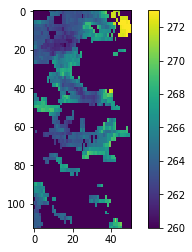

In [26]:
# Export is finished! Let's chekc results. Visualize NPY
plt.close()
plt.imshow(np.load(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2', '20200217T191500.npy')), vmin=260, vmax=273)
plt.colorbar()
plt.show()

In [1]:
# Reconstruct geotiff from NPY. import function:
from SSGPToolbox.Preparators.common_functions import reconstruct_geotiff

In [4]:
# Run reconstruction. Just set path to NPY and saved metadata, and to output GeoTiff
reconstruct_geotiff(npy_path = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2', '20200217T191500.npy'),
                    metadata_path = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2', 'l2_metadata.json'),
                    output_path = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'L2', '20200217T191500_reconstructed.tif'))

### That's all! With these functions you can automate pre-processing and post-processing of your data

## What about MOD11A1, MOD11A2, MYD11A1, MYD11A2?
### It's all the same, just one additional option is added. You must specify day or night data must be used, as in example:

In [7]:
# Path to input file
input_mod11_a1 = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'source', 'MOD11A1.A2020048.h20v03.006.2020050065448.hdf')

# Extent for final file
extent={'minX': 39, 'minY': 50,'maxX': 40, 'maxY': 51}

# Spatial resolution for final file
resolution={'xRes': 1000, 'yRes': 1000}

# Key values for cloud and no-data pixels. Which values should they have in final file?
key_values = {'gap': -100.0, 'skip': -200.0,'NoData': -32768.0}

# What to do with quality flags?
# 0 - Do not use non-confident data
# 1 - Use everything
qa_policy = 0

# Day or night?
layer = 'Day' # or layer = 'Night'

# Initialize class
preparator = MODIS_MOD_MYD_11(input_mod11_a1,
                              key_values = key_values,
                              extent=extent,
                              resolution=resolution,
                              qa_policy=qa_policy,
                              layer=layer)

preparator.archive_to_geotiff(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'A1'))
preparator.archive_to_npy(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'A1'))

In [8]:
# And for A2 the same too
input_mod11_a2 = os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'source', 'MOD11A2.A2020033.h20v03.006.2020042185231.hdf')

preparator = MODIS_MOD_MYD_11(input_mod11_a2,
                              key_values = key_values,
                              extent=extent,
                              resolution=resolution,
                              qa_policy=qa_policy,
                              layer=layer)

preparator.archive_to_geotiff(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'A2'))
preparator.archive_to_npy(os.path.join(os.pardir, 'Samples', 'MODIS_preparation_example', 'prepared', 'A2'))